In [ ]:
#SGD
#RMS_prob
#ADAM

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(x_train,y_train),(x_test,y_test)=tf.keras.datasets.mnist.load_data()
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

x_train,x_test=x_train/255.0,x_test/255.0

model=models.Sequential([
    layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (4, 4), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
    ])
model.summary()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 24, 24, 32)          │             832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 12, 12, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 9, 9, 64)            │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 4, 4, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 2, 2, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 141,002 (550.79 KB)

 Trainable params: 141,002 (550.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
adam_model=model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

adam_history = model.fit(x_train, y_train, epochs=5,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 3ms/step - accuracy: 0.8987 - loss: 0.3212 - val_accuracy: 0.9876 - val_loss: 0.0377
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9851 - loss: 0.0472 - val_accuracy: 0.9886 - val_loss: 0.0354
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9902 - loss: 0.0329 - val_accuracy: 0.9911 - val_loss: 0.0278
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9920 - loss: 0.0244 - val_accuracy: 0.9891 - val_loss: 0.0348
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9937 - loss: 0.0191 - val_accuracy: 0.9923 - val_loss: 0.0276


In [ ]:
adam_test_loss, adam_test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy using adam optimizer: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0776
Test accuracy using adam optimizer: 0.9941


In [ ]:
from tensorflow.keras.optimizers import SGD
sgd = SGD(learning_rate=0.01, momentum=0.9)

sgd_model=model.compile(optimizer=sgd,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

sgd_history = model.fit(x_train, y_train, epochs=5,batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9969 - loss: 0.0101 - val_accuracy: 0.9933 - val_loss: 0.0244
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9988 - loss: 0.0044 - val_accuracy: 0.9933 - val_loss: 0.0276
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9993 - loss: 0.0029 - val_accuracy: 0.9932 - val_loss: 0.0289
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9993 - loss: 0.0019 - val_accuracy: 0.9934 - val_loss: 0.0299
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9997 - loss: 0.0012 - val_accuracy: 0.9941 - val_loss: 0.0297


In [ ]:
sgd_test_loss, sgd_test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy using SGD optimizer: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0776
Test accuracy using SGD optimizer: 0.9941


In [ ]:
# Compile RMSprop optimizer model
rms_model=model.compile(optimizer='rmsprop',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

rms_history = model.fit(x_train, y_train, epochs=5, batch_size=32,
                            validation_data=(x_test, y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9990 - loss: 0.0036 - val_accuracy: 0.9912 - val_loss: 0.0442
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9986 - loss: 0.0053 - val_accuracy: 0.9932 - val_loss: 0.0473
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9990 - loss: 0.0035 - val_accuracy: 0.9924 - val_loss: 0.0504
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9991 - loss: 0.0040 - val_accuracy: 0.9924 - val_loss: 0.0512
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9994 - loss: 0.0016 - val_accuracy: 0.9926 - val_loss: 0.0624


In [ ]:
rms_test_loss, rms_test_acc = model.evaluate(x_test, y_test)
print(f'Test accuracy using RMSprop optimizer: {rms_test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9910 - loss: 0.0776
Test accuracy using RMSprop optimizer: 0.9926


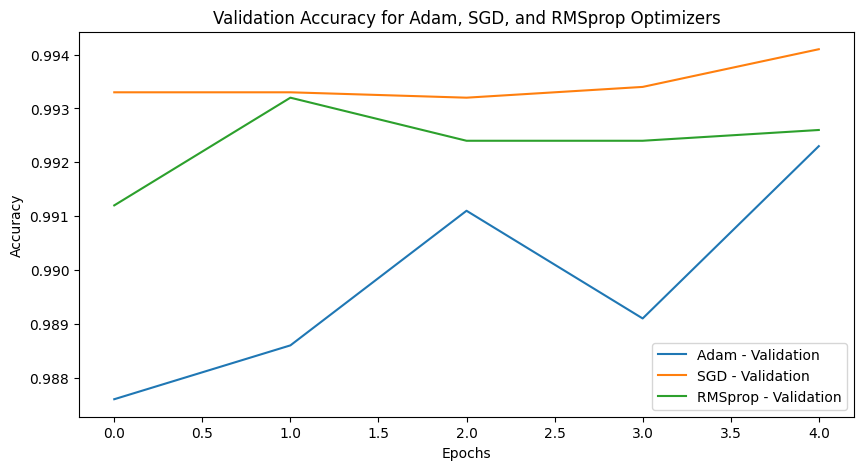

In [ ]:
# Plot training and validation accuracy for all optimizers
def plot_accuracy(histories, title):
    plt.figure(figsize=(10, 5))

    # Adam accuracy
    #plt.plot(histories['adam'].history['accuracy'], label='Adam - Training')
    plt.plot(histories['adam'].history['val_accuracy'], label='Adam - Validation')

    # SGD accuracy
    #plt.plot(histories['sgd'].history['accuracy'], label='SGD - Training')
    plt.plot(histories['sgd'].history['val_accuracy'], label='SGD - Validation')

    # RMSprop accuracy
    #plt.plot(histories['rms'].history['accuracy'], label='RMSprop - Training')
    plt.plot(histories['rms'].history['val_accuracy'], label='RMSprop - Validation')

    plt.title(title)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

plot_accuracy({'adam': adam_history, 'sgd': sgd_history, 'rms': rms_history},
              'Validation Accuracy for Adam, SGD, and RMSprop Optimizers')